# Deliverable

* DONE - **Slope** - cap rolling window size at 1 month 
    * Tomorrow - maximize corr in a 1 month timespan 
* DONE - Percentage change rather than the absolute dollar (based on initial)
* DONE - 1 month, 3 month, 6 month, 12 month 
* DONE - Superimpose S&P (scaled) onto Funding (scaled) line chart

# Takeaways

* Changing to PCT change **did not** affect correlations

# Libraries

In [15]:
import pandas as pd
import numpy as np
# display the DataFrame with only 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

# Assumptions

Assumptions I make will be listed below. 
* Used **yahoo finance data** for S&P 500 prices - https://finance.yahoo.com/quote/%5EGSPC/history?p=%255EGSPC&nn=1 (used the API, as this is not available for download by conventional users)


# 1 - Reading in CSV

In [16]:
data = pd.read_csv('./fsi.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y') 
data

,Date,OFR FSI,Credit,Equity valuation,Safe assets,Funding,Volatility,United States,Other advanced economies,Emerging markets
0,2000-01-03,2.14,0.54,-0.05,0.67,0.47,0.51,1.77,0.52,-0.15
1,2000-01-04,2.42,0.60,0.08,0.63,0.55,0.56,2.08,0.47,-0.14
2,2000-01-05,2.30,0.57,0.08,0.65,0.50,0.49,2.02,0.41,-0.13
3,2000-01-06,2.29,0.55,0.08,0.58,0.57,0.52,2.06,0.35,-0.13
4,2000-01-07,2.00,0.66,-0.01,0.52,0.56,0.27,1.77,0.37,-0.13
...,...,...,...,...,...,...,...,...,...,...
5874,2023-04-25,-0.35,0.22,-0.12,-0.09,-0.53,0.18,-0.09,-0.42,0.17
5875,2023-04-26,-0.26,0.23,-0.10,-0.10,-0.49,0.20,-0.07,-0.35,0.16
5876,2023-04-27,-0.67,0.19,-0.14,-0.13,-0.65,0.06,-0.34,-0.47,0.15
5877,2023-04-28,-0.68,0.19,-0.18,-0.12,-0.52,-0.06,-0.32,-0.50,0.13


# 2 - Bring in S&P Data & More Cleaning of Data 

In [30]:
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yfin 
yfin.pdr_override()

start_date = dt.datetime(2001, 1, 1)
end_date = dt.datetime(2023, 5, 2)

df = pdr.get_data_yahoo("^GSPC", start="2000-01-03", end="2023-05-02")
df = df.reset_index()
# 
df["1MonPriceReturn"] = (df["Close"].shift(-1 * int(365.25 / 12 * .69)) - df["Close"]) / df["Close"]
df["3MonPriceReturn"] = (df["Close"].shift(-1 * int(365.25 / 4 * .69)) - df["Close"]) / df["Close"]
df["6MonPriceReturn"] = (df["Close"].shift(-1 * int(365.25 / 2 * .69)) - df["Close"]) / df["Close"]
df["12MonPriceReturn"] = (df["Close"].shift(-1 * int(365.25 * .69)) - df["Close"]) / df["Close"]

df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,1MonPriceReturn,3MonPriceReturn,6MonPriceReturn,12MonPriceReturn
0,2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000,-0.03,0.03,0.01,-0.12
1,2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000,0.02,0.07,0.03,-0.04
2,2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000,0.02,0.06,0.04,-0.05
3,2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000,0.01,0.07,0.05,-0.07
4,2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000,0.00,0.05,0.02,-0.10
...,...,...,...,...,...,...,...,...,...,...,...
5864,2023-04-25,4126.43,4126.43,4071.38,4071.63,4071.63,3978640000,NaN,NaN,NaN,NaN
5865,2023-04-26,4087.78,4089.67,4049.35,4055.99,4055.99,3837030000,NaN,NaN,NaN,NaN
5866,2023-04-27,4075.29,4138.24,4075.29,4135.35,4135.35,3750550000,NaN,NaN,NaN,NaN
5867,2023-04-28,4129.63,4170.06,4127.18,4169.48,4169.48,4087800000,NaN,NaN,NaN,NaN


It is expected that the last 90 rows of 3 Month Price Return, 180 of 6 Month Price Return, and last 360 of 12 Month Price Return will be NULL (NaN)

In [31]:
clean_data_begin = df.merge(data, on = 'Date')
clean_data_begin.head()

,Date,Open,High,Low,Close,Adj Close,Volume,1MonPriceReturn,3MonPriceReturn,6MonPriceReturn,12MonPriceReturn,OFR FSI,Credit,Equity valuation,Safe assets,Funding,Volatility,United States,Other advanced economies,Emerging markets
0,2000-01-03,1469.25,1478.00,1438.36,1455.22,1455.22,931800000,-0.03,0.03,0.01,-0.12,2.14,0.54,-0.05,0.67,0.47,0.51,1.77,0.52,-0.15
1,2000-01-04,1455.22,1455.22,1397.43,1399.42,1399.42,1009000000,0.02,0.07,0.03,-0.04,2.42,0.60,0.08,0.63,0.55,0.56,2.08,0.47,-0.14
2,2000-01-05,1399.42,1413.27,1377.68,1402.11,1402.11,1085500000,0.02,0.06,0.04,-0.05,2.30,0.57,0.08,0.65,0.50,0.49,2.02,0.41,-0.13
3,2000-01-06,1402.11,1411.90,1392.10,1403.45,1403.45,1092300000,0.01,0.07,0.05,-0.07,2.29,0.55,0.08,0.58,0.57,0.52,2.06,0.35,-0.13
4,2000-01-07,1403.45,1441.47,1400.73,1441.47,1441.47,1225200000,0.00,0.05,0.02,-0.10,2.00,0.66,-0.01,0.52,0.56,0.27,1.77,0.37,-0.13


In [32]:
clean_data = clean_data_begin.loc[:, ['Date', 'Close', 'Credit', 'Safe assets', 'Funding', 'OFR FSI', '1MonPriceReturn', '3MonPriceReturn', '6MonPriceReturn', '12MonPriceReturn']]
clean_data

,Date,Close,Credit,Safe assets,Funding,OFR FSI,1MonPriceReturn,3MonPriceReturn,6MonPriceReturn,12MonPriceReturn
0,2000-01-03,1455.22,0.54,0.67,0.47,2.14,-0.03,0.03,0.01,-0.12
1,2000-01-04,1399.42,0.60,0.63,0.55,2.42,0.02,0.07,0.03,-0.04
2,2000-01-05,1402.11,0.57,0.65,0.50,2.30,0.02,0.06,0.04,-0.05
3,2000-01-06,1403.45,0.55,0.58,0.57,2.29,0.01,0.07,0.05,-0.07
4,2000-01-07,1441.47,0.66,0.52,0.56,2.00,0.00,0.05,0.02,-0.10
...,...,...,...,...,...,...,...,...,...,...
5863,2023-04-25,4071.63,0.22,-0.09,-0.53,-0.35,NaN,NaN,NaN,NaN
5864,2023-04-26,4055.99,0.23,-0.10,-0.49,-0.26,NaN,NaN,NaN,NaN
5865,2023-04-27,4135.35,0.19,-0.13,-0.65,-0.67,NaN,NaN,NaN,NaN
5866,2023-04-28,4169.48,0.19,-0.12,-0.52,-0.68,NaN,NaN,NaN,NaN


In [37]:
clean_data['Stress sum'] = clean_data['Credit'] + clean_data['Funding'] + clean_data['Safe assets']
clean_data['Stress avg'] = ( clean_data['Credit'] + clean_data['Funding'] + clean_data['Safe assets'] ) / 3

In [98]:
def add_rolling_window(df, window_size):
    '''
    Parameters
    * df
    * window size in days 
    
    Returns new df s.t. there are three columns added, Credit W3
    '''
    # df["12MonPriceReturn"] = (df["Close"].shift(-1 * int(365.25 * .69)) - df["Close"]) / df["Close"]
    # Ensure this is as expected 
    new_df = df.copy(deep=True)
    for col in ['Credit', 'Safe assets', 'Funding']:
        new_df[f'{col} Win{window_size}'] = (df[col] - df[col].shift(1 * int(window_size / .69))) / (window_size)
    new_df['Stress slope avg'] = (new_df[f'Credit Win{window_size}'] + new_df[f'Safe assets Win{window_size}'] + new_df[f'Funding Win{window_size}']) / 3
    new_df['Stress slope sum'] = (new_df[f'Credit Win{window_size}'] + new_df[f'Safe assets Win{window_size}'] + new_df[f'Funding Win{window_size}']) 
    return new_df 

def get_best_rolling_window(df, max_rolling_window_size):
    max_ = 0
    window_size_ = -1
    for window_size in range(max_rolling_window_size):
        clean_w_slope = add_rolling_window(df, window_size) 
        corr_matrix = clean_w_slope.loc[:, ['Credit', 'Safe assets', 'Funding', f'Credit Win{window_size}', f'Safe assets Win{window_size}', f'Funding Win{window_size}', 'Stress sum', 'Stress avg','Stress slope avg', 'Stress slope sum','1MonPriceReturn', '3MonPriceReturn', '6MonPriceReturn', '12MonPriceReturn']].corr()
        cmat = corr_matrix.loc[:, ['1MonPriceReturn', '3MonPriceReturn', '6MonPriceReturn', '12MonPriceReturn']].iloc[:10]
        top_corr = cmat.agg(func=np.sum).agg(func=np.sum) 
        if top_corr < max_: 
            max_ = top_corr 
            window_size_ = window_size 
    return window_size_, max_




# Get best rolling window

In [99]:
max_rolling_window_size = 120
best_window_size, max_corr = get_best_rolling_window(clean_data, max_rolling_window_size)
clean_w_slope = add_rolling_window(clean_data, best_window_size)

In [100]:
clean_w_slope 

,Date,Close,Credit,Safe assets,Funding,OFR FSI,1MonPriceReturn,3MonPriceReturn,6MonPriceReturn,12MonPriceReturn,Stress sum,Stress avg,Credit Win103,Safe assets Win103,Funding Win103,Stress slope avg,Stress slope sum
0,2000-01-03,1455.22,0.54,0.67,0.47,2.14,-0.03,0.03,0.01,-0.12,1.68,0.56,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,1399.42,0.60,0.63,0.55,2.42,0.02,0.07,0.03,-0.04,1.78,0.59,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,1402.11,0.57,0.65,0.50,2.30,0.02,0.06,0.04,-0.05,1.73,0.58,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,1403.45,0.55,0.58,0.57,2.29,0.01,0.07,0.05,-0.07,1.69,0.56,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,1441.47,0.66,0.52,0.56,2.00,0.00,0.05,0.02,-0.10,1.75,0.58,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,2023-04-25,4071.63,0.22,-0.09,-0.53,-0.35,NaN,NaN,NaN,NaN,-0.41,-0.14,-0.00,0.01,-0.00,0.00,0.00
5864,2023-04-26,4055.99,0.23,-0.10,-0.49,-0.26,NaN,NaN,NaN,NaN,-0.36,-0.12,-0.00,0.01,-0.00,0.00,0.00
5865,2023-04-27,4135.35,0.19,-0.13,-0.65,-0.67,NaN,NaN,NaN,NaN,-0.58,-0.19,-0.00,0.01,-0.00,0.00,0.00
5866,2023-04-28,4169.48,0.19,-0.12,-0.52,-0.68,NaN,NaN,NaN,NaN,-0.44,-0.15,-0.00,0.01,-0.00,0.00,0.00


# Graph Correlations (Single-Column to S&P Price Returns)

In [101]:
import plotly.graph_objects as go 

# create a heatmap of the correlation matrix using Plotly
corr_matrix = clean_w_slope.loc[:, ['Credit', 'Safe assets', 'Funding', f'Credit Win{best_window_size}', f'Safe assets Win{best_window_size}', f'Funding Win{best_window_size}', 'Stress sum', 'Stress avg','Stress slope avg', 'Stress slope sum','1MonPriceReturn', '3MonPriceReturn', '6MonPriceReturn', '12MonPriceReturn']].corr()
cmat = corr_matrix.loc[:, ['1MonPriceReturn', '3MonPriceReturn', '6MonPriceReturn', '12MonPriceReturn']].iloc[:10]

fig = go.Figure(data=go.Heatmap(
                   z=cmat.values,
                   x=cmat.columns,
                   y=cmat.index,
                   colorscale='Viridis'))

# update the layout to make the plot larger, increase font size, and add lines to separate rectangles
fig.update_layout(
    width=1500,
    height=1000,
    font=dict(
        size=30,
    ),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='white',
        tickangle=45,
        tickfont=dict(
            size=25,
        )
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='white',
        tickfont=dict(
            size=25,
        )
    )
)

# show the plot
fig.show()


##  Text format correlations (Single Column to S&P Price Returns)

In [36]:
cmat

,1MonPriceReturn,3MonPriceReturn,6MonPriceReturn,12MonPriceReturn,1MonPriceReturn
Credit,-0.09,-0.18,-0.17,-0.09,-0.09
Safe assets,0.05,0.09,0.10,0.10,0.05
Funding,-0.13,-0.24,-0.25,-0.15,-0.13
Stress sum,-0.10,-0.20,-0.19,-0.11,-0.10
Stress avg,-0.10,-0.20,-0.19,-0.11,-0.10


# S&P and Funding (Pure Value)

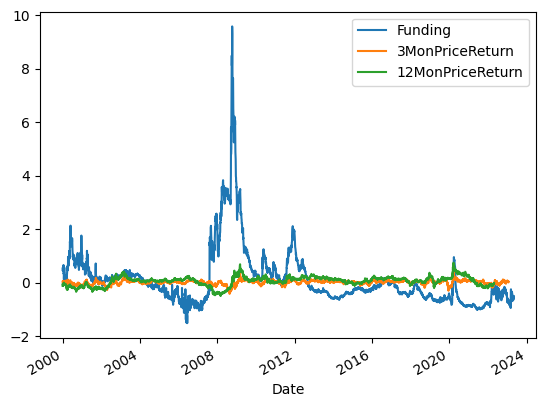

In [70]:
spdf = clean_data.copy(deep=True)
spdf.set_index('Date', inplace = True)
spdf = spdf.loc[:, ['Funding', '3MonPriceReturn', '12MonPriceReturn']]

# spdf.head()
spdf.plot();


# S&P and Funding (Scaled between 1 and 0 for reaability)

<Axes: >

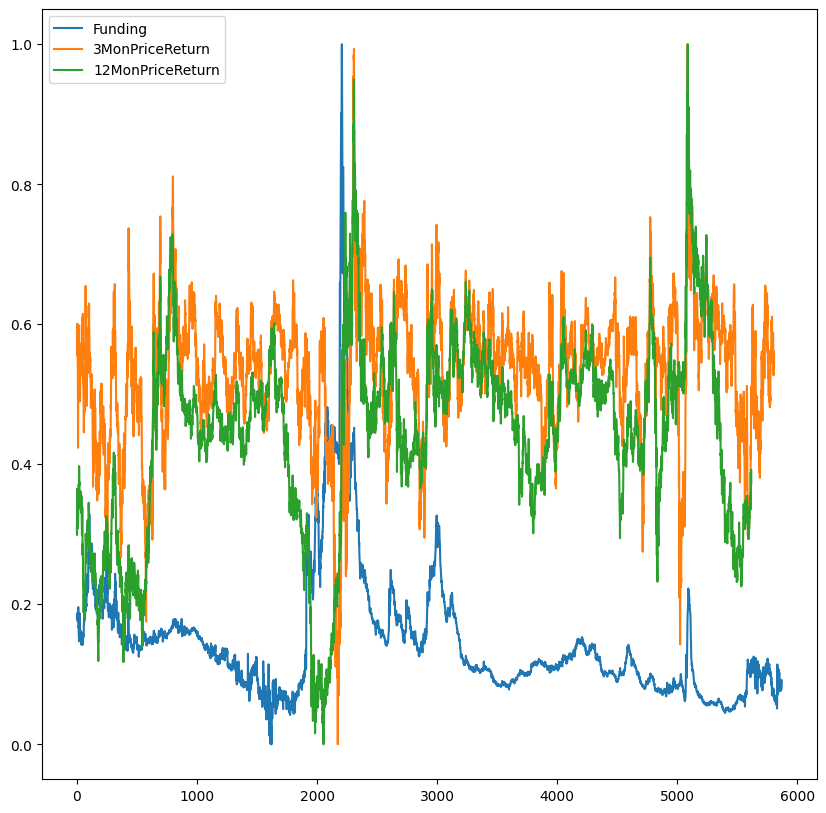

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # create a MinMaxScaler object
spdf_cols = spdf.columns.tolist()
scaled_df = scaler.fit_transform(spdf)  # apply scaling to the specified columns
scaled_df = pd.DataFrame(scaled_df, columns=spdf.columns)
scaled_df.plot(figsize = (10, 10))

# AI Models 

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

tolerance = 0 # Change if prefer a certain number > 0 

# Split the data into training and testing sets
X = clean_data.drop(['3MonPriceReturn', '6MonPriceReturn', '12MonPriceReturn', '36MonPriceReturn', '60MonPriceReturn', '120MonPriceReturn', 'OFR FSI', 'Stress sum', 'Stress avg', 'Date', 'Close'], axis=1) # Only features we train on are Credit, Safe Assets, and Funding
y = (clean_data[['3MonPriceReturn', '6MonPriceReturn', '12MonPriceReturn']] > tolerance).any(axis=1).astype(int) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
clean_data 

,Date,Close,Credit,Safe assets,Funding,OFR FSI,3MonPriceReturn,6MonPriceReturn,12MonPriceReturn,36MonPriceReturn,60MonPriceReturn,120MonPriceReturn,Stress sum,Stress avg
0,2000-01-03,1455.22,0.54,0.67,0.47,2.14,0.03,0.01,-0.12,-0.37,-0.18,-0.21,1.68,0.56
1,2000-01-04,1399.42,0.60,0.63,0.55,2.42,0.07,0.03,-0.04,-0.34,-0.15,-0.19,1.78,0.59
2,2000-01-05,1402.11,0.57,0.65,0.50,2.30,0.06,0.04,-0.05,-0.34,-0.16,-0.18,1.73,0.58
3,2000-01-06,1403.45,0.55,0.58,0.57,2.29,0.07,0.05,-0.07,-0.34,-0.15,-0.18,1.69,0.56
4,2000-01-07,1441.47,0.66,0.52,0.56,2.00,0.05,0.02,-0.10,-0.35,-0.18,-0.21,1.75,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,2023-04-25,4071.63,0.22,-0.09,-0.53,-0.35,NaN,NaN,NaN,NaN,NaN,NaN,-0.41,-0.14
5864,2023-04-26,4055.99,0.23,-0.10,-0.49,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,-0.36,-0.12
5865,2023-04-27,4135.35,0.19,-0.13,-0.65,-0.67,NaN,NaN,NaN,NaN,NaN,NaN,-0.58,-0.19
5866,2023-04-28,4169.48,0.19,-0.12,-0.52,-0.68,NaN,NaN,NaN,NaN,NaN,NaN,-0.44,-0.15


In [25]:
clean_data.shape

(5868, 14)

Accuracy: 0.9497444633730835
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       207
           1       0.96      0.98      0.97       967

    accuracy                           0.95      1174
   macro avg       0.93      0.90      0.91      1174
weighted avg       0.95      0.95      0.95      1174

Confusion Matrix:
 [[169  38]
 [ 21 946]]


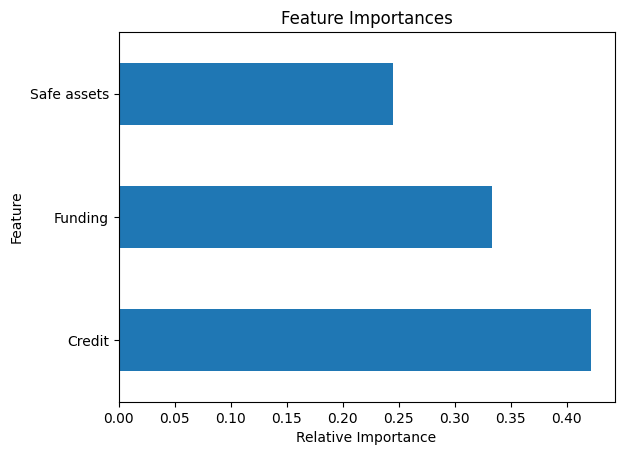

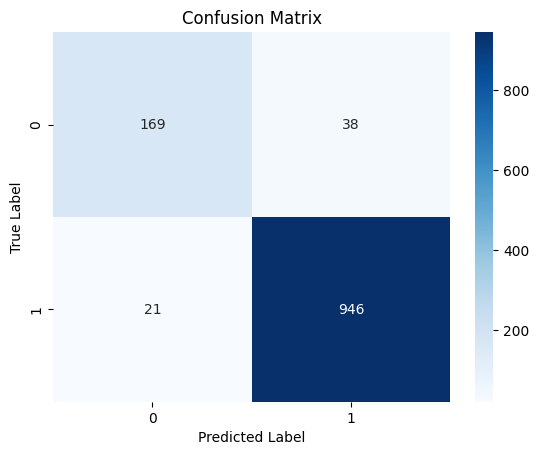

In [26]:

# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Plot feature importances
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
